# 强震动反应谱分析
## 1、反应谱的概念
1. 单自由度弹性系统在给定地震动作用下的最大反应随结构自振周期的变化曲线。同时是阻尼比的函数。 
2. 这里所说的单自由度体系可认为是满足如下条件的单质点结构，将结构中参 振动的质量全部集中在一点上，用无重的弹性杆件系统支撑于地面上。并假定 地面运动和结构振动只是单方向的水平平移运动，不发生扭转。地基是刚性地面
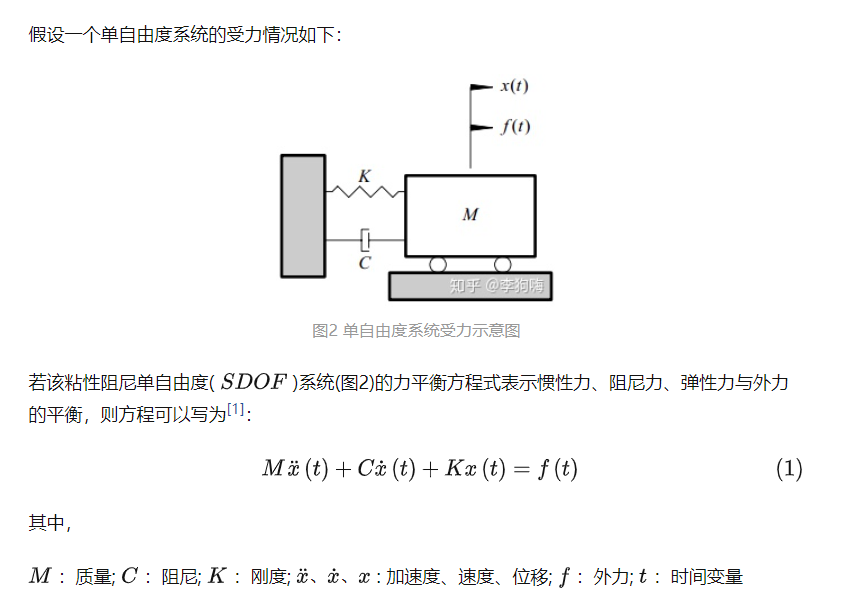
## 2、反应谱的原理
    - 单自由度弹性系统在地震作用下的运动方程为
$$ m\ddot{X} + c\dot{X} + kX = -m\ddot{X_g}$$
    - 常用解法有：
        1. Duhuamel积分
        2. 中心差分法
        3. NewMark-beta法
        4. 解析法（Nigam-Jennings法）
    - 核心：求解运动方程！
    - **反应谱是地震动的特性，和结构无关**

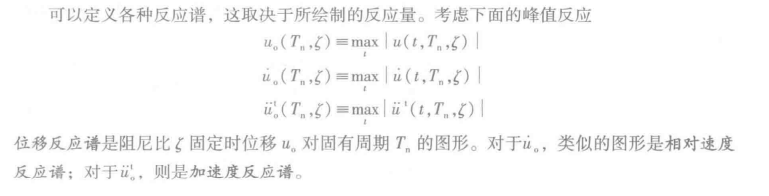
### 转换国内标准地震动格式为csv单文件
1. csv格式为，首行，dt,台站号，三列分别为ns，ew，up

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 开发环境推荐
- （Anaconda）Python
    - https://www.anaconda.com/
    - Notebook
    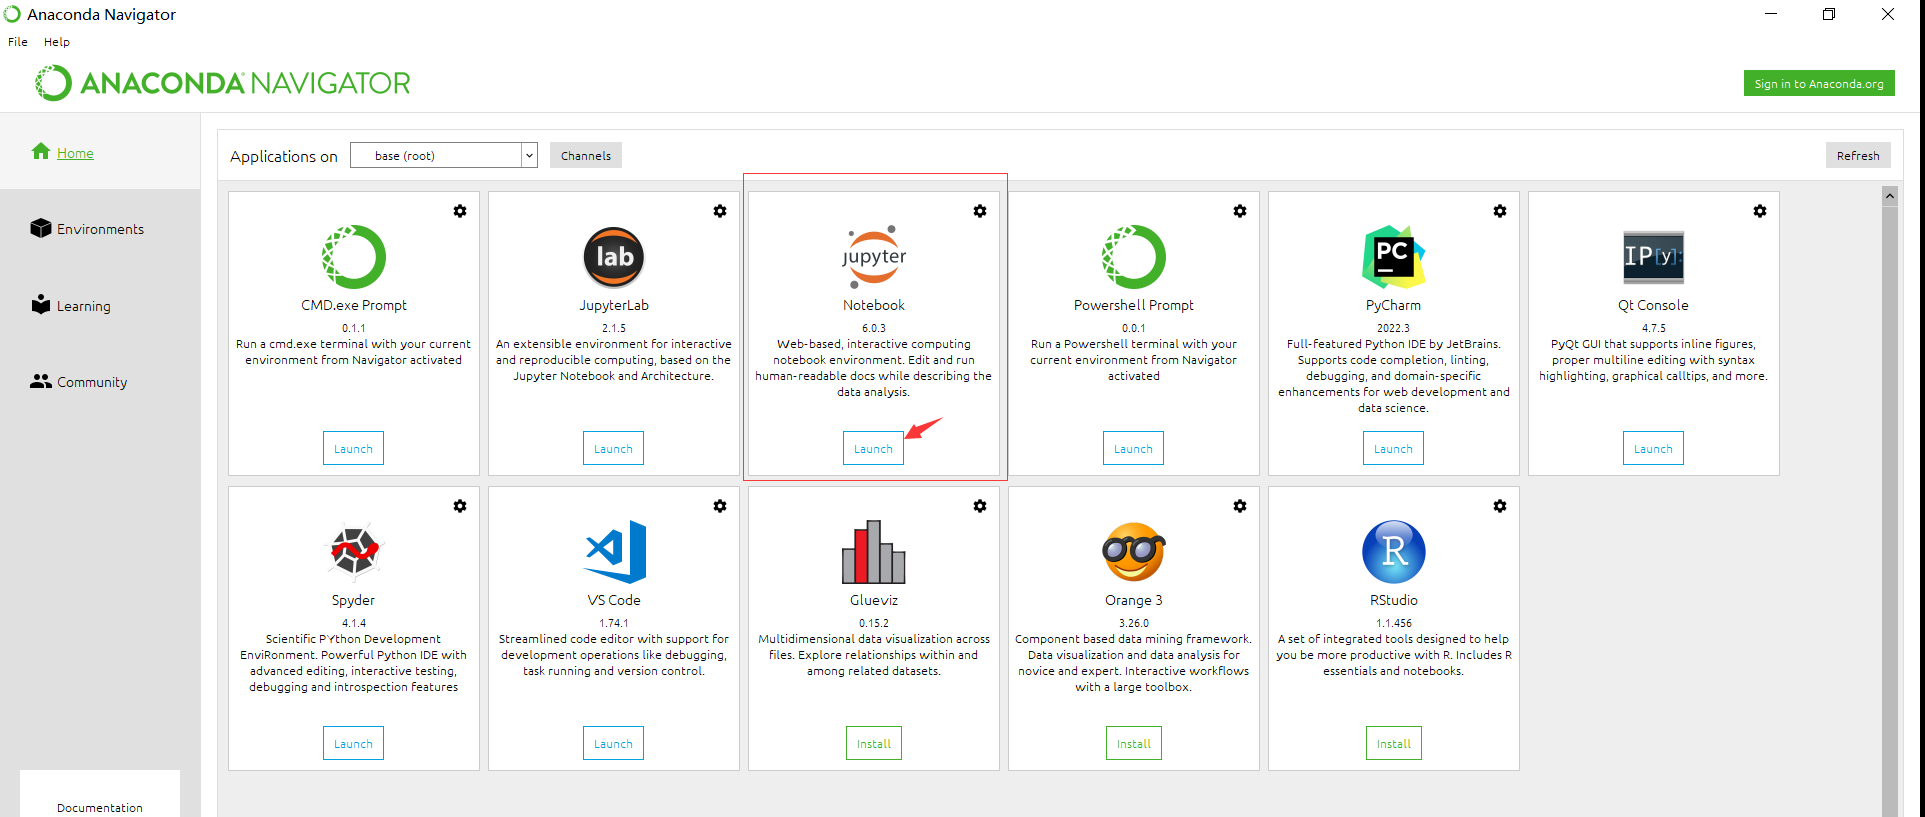

https://github.com/iamumr/omnispectrum.git
### 导入处理模块
- 模块主要是两部分，一部分是反应谱计算程序，第二部分是全方位反应谱计算程序，第二部分依赖于第一部分
    - spectrum（反应谱）
    - OmniSpectrum（全方位反应谱）
    - convert2csv（三向地震动转换为单个csv文件），目前仅支持国内台站.dat格式
    - 部分绘图函数
- 两种导入方式
     1. `pip install OmniSpectrum` 安装我已经打好的包 https://pypi.org/project/OmniSpectrum/
     2. 单独使用omnispectrum.py文件 `git clone https://github.com/iamumr/omnispectrum.git`

In [1]:
# pip安装后可用
import omnispectrum

In [1]:
# omnispectrum位于相同目录下可用
from spectrum import *

In [2]:
c = omnispectrum.convert2csv()

In [2]:
c = convert2csv()

In [3]:
c.convert(r"C:\Users\liguo\Downloads\原始数据")

In [2]:
def get_data(path):
    f = open(path, 'r')
    d = f.readline()
    pos = d[:-1]
    for i in range(11):
        d = f.readline()
    t = float(d[53:59])
    for i in range(4):
        d = f.readline()
    data = f.readlines()
    sp = []
    for d in data:
        d1=d.split()
        for d11 in d1:
            sp.append(d11)
    f.close()
    return pos, t, sp

In [19]:
data = {}
path = r"C:\Users\liguo\Downloads\原始数据"
output_path = None
for root,dirs,files in os.walk(path):
    for file in files:
        if file.split('.')[-1] == 'dat':
            p, t, sp=get_data(os.path.join(path,file))
            data[p] = (t, sp)
for d in data.keys():
    if d[-1] ==  '1':
        f=open('{}.csv'.format(d[0:6]), 'w')
        f.write('{},{},\n'.format(data[d][0], d))
        for i in range(len(data[d][1])):
            ew = data[d][1]
            tmp = d[0:-1] + '2'
            ns = data[tmp][1]
            tmp = d[0:-1] + '3'
            up = data[tmp][1]
            f.write('{},{},{}\n'.format(ew[i], ns[i],up[i]))
        f.close()

### spectrum单独使用
1. def __init__(self, acc:list, t:float, baseline_correction: bool = False):
2. 需要给定参数，t为dt，direction, acc为加速度时程
3. baseline_correction:基线修正，默认为False, 此处内置的为Boyce方法的基线修正
    - 过长的地震动基线修正效果不佳，建议选择有效区段

参考： 地震动基线漂移校正方法的比较研究

In [4]:
data = pd.read_csv('022DLB.csv', header=None)

In [5]:
data

,0,1,2
0,0.010000,022DLB180528015001,NaN
1,-0.001026,1.106262E-2,-0.022961
2,-0.001827,9.872437E-3,-0.022259
3,0.000755,1.296997E-2,-0.019661
4,0.002754,1.266479E-2,-0.021648
...,...,...,...
57696,0.000874,2.365112E-3,0.004631
57697,0.002235,1.663208E-3,0.001129
57698,0.003593,1.770020E-3,-0.004829
57699,0.004513,8.468628E-3,-0.005138


In [6]:
spect = spectrum(data.iloc[1:,0], 0.01)

### 获得PGA、PGV、PGD

In [8]:
spect.get_PGA()

188.8696

In [9]:
spect.get_PGV()

3.1906307959865403

In [7]:
spect.get_PGD()

75.27013399236618

### Sa调幅
- 使该条地震动在T周期是最大幅值到达target

In [10]:
spect.tiaofu_sa(3, 100)

59.37349773568343

### NewMark—beta方法
结构动力学理论及其在地震工程中的应用 P128

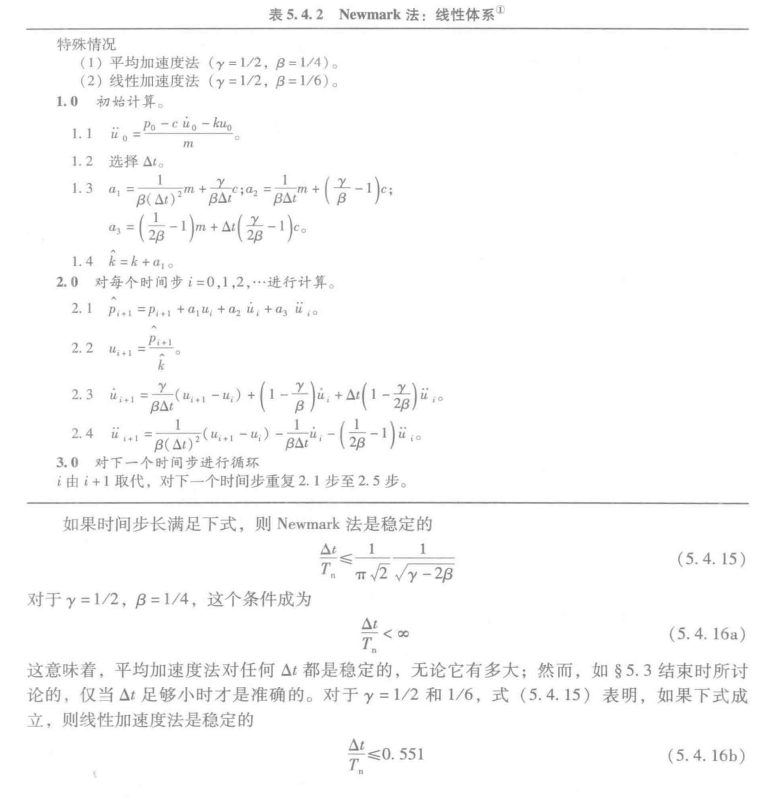
def newmark_beta(self, T, ksi=0.05, gamma=0.5, beta=0.25):  # 步长，周期，地震波

阻尼比默认值设为0.05

In [11]:
spect.newmark_beta(1)

(array([0.00000000e+00, 4.21798538e-06, 1.41955430e-05, ...,
        1.73425263e-03, 1.71810474e-03, 1.67733705e-03]),
 array([ 0.00000000e+00,  8.43597076e-04,  1.15191444e-03, ...,
        -7.58904410e-05, -3.15368918e-03, -4.99984710e-03]),
 array([ 0.        , -0.00069657, -0.00128419, ..., -0.06841787,
        -0.06584653, -0.06307712]))

### 中心差分法
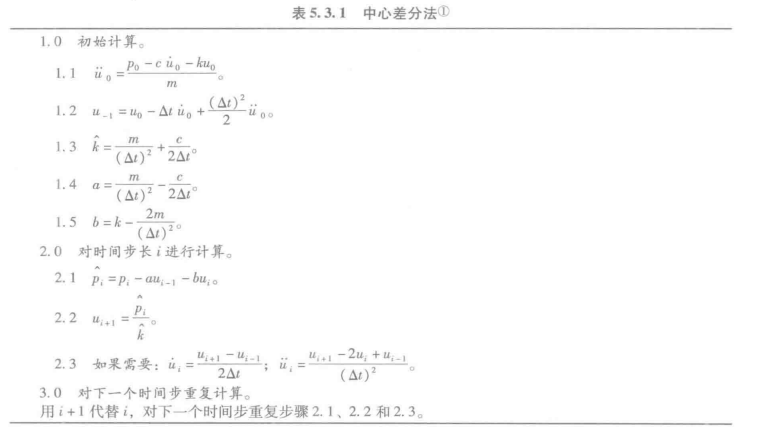

In [12]:
spect.central_difference(1)

In [13]:
spect.four(1)

(array([0.00000000e+00, 1.73310225e-03, 3.46620451e-03, ...,
        4.99948007e+01, 4.99965338e+01, 4.99982669e+01]),
 array([   6.38901322, 2225.83071202,  924.8526573 , ...,  591.36192763,
         924.8526573 , 2225.83071202]))

# 全方位反应谱
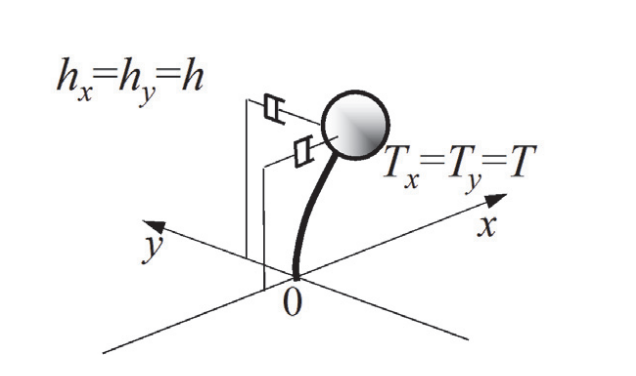
$$a_\theta(t) = a_x(t)\cos\theta + a_y(t)\sin\theta$$

In [3]:
omni = omnispectrum.OmniSpectrum(r'C:\Users\liguo\Downloads\原始数据\022DLB.csv')

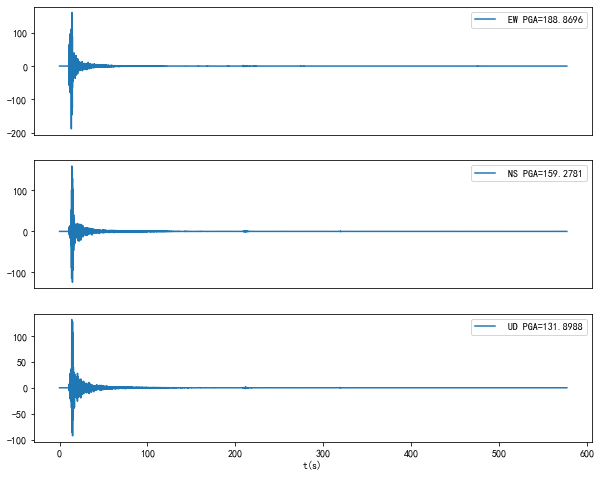

In [6]:
omnispectrum.graph(omni.get_single('ew'), omni.get_single('ns'), omni.get_single('up'), 'test.jpg', 'a')

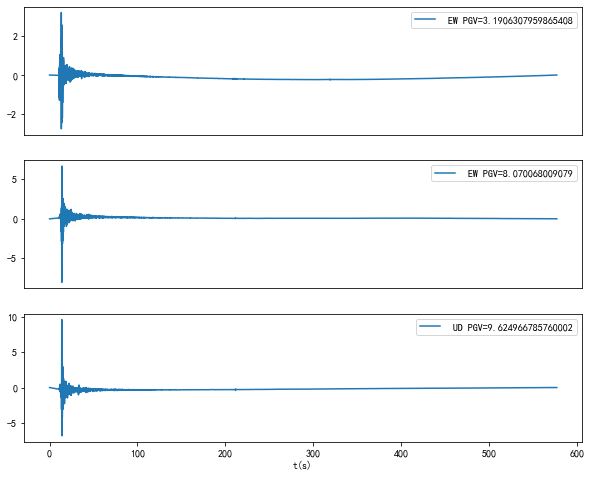

In [4]:
omnispectrum.graph(omni.get_single('ew'), omni.get_single('ns'), omni.get_single('up'), 'test.jpg', 'v')

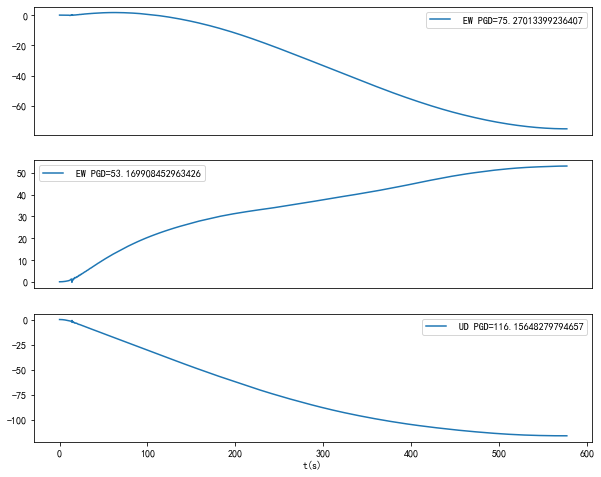

In [5]:
omnispectrum.graph(omni.get_single('ew'), omni.get_single('ns'), omni.get_single('up'), 'test.jpg', 'd')

In [7]:
ew = omni.get_single('ew')
ns = omni.get_single('ns')
up = omni.get_single('up')

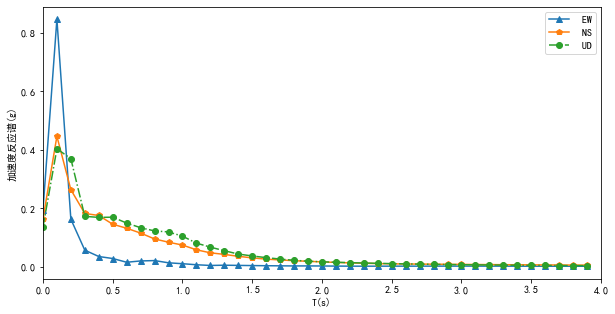

In [8]:
ew.get_sa(0, 4, 0.1)
ns.get_sa(0, 4, 0.1)
up.get_sa(0, 4, 0.1)
omnispectrum.fyp(ew, ns, up, 'test.jpg', 'a')

In [4]:
omni = OmniSpectrum(r'C:\Users\liguo\Downloads\原始数据\022DLB.csv')

In [3]:
# 获得任意角度的地震动
omni.any_angle(omni.ew, omni.ns, 100)

array([-0.0064866 , -0.00657473, -0.00591623, ...,  0.00220242,
       -0.00039676, -0.00484407])

In [4]:
# 获得任意角度的地震动spectrum对象
s100 = omni.get_single(100)

In [4]:
omni.path

'C:\\Users\\liguo\\Downloads\\原始数据\\022DLB.csv'

In [7]:
omni.value_a

<ListProxy object, typeid 'list' at 0x1e25a40f610>

100%|████████████████████████████████████████████████████████████████████████████████| 181/181 [47:01<00:00, 15.59s/it]


处理C:\Users\liguo\Downloads\原始数据\022DLB.csv


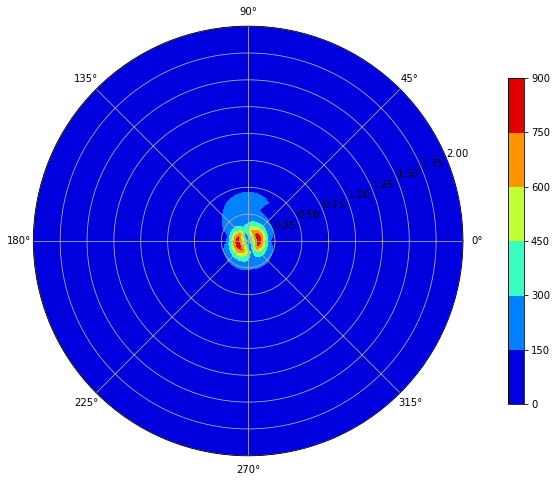

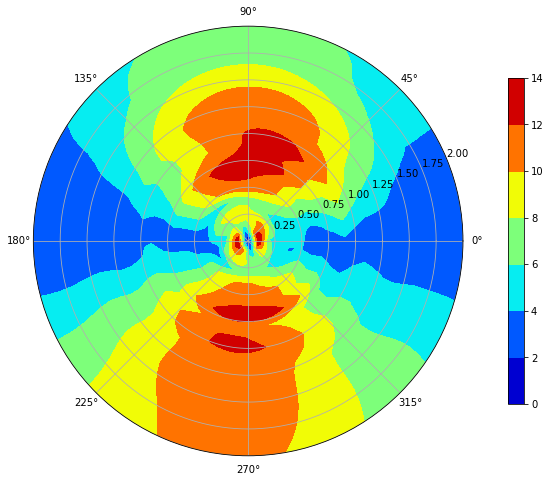

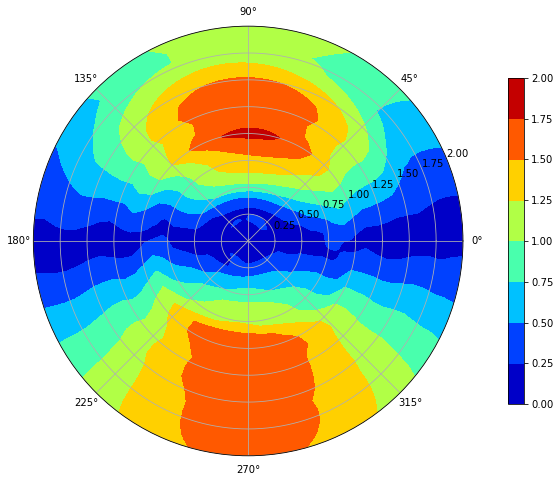

In [5]:
omni.any_angle_spectrum()

### 作为模块使用，直出Word
- 最简单使用
    - `python -m omnispectrum.omnispectrum -i "C:\Users\liguo\Downloads\原始数据" `
- 查看帮助
    - `python -m omnispectrum.omnispectrum --help`
    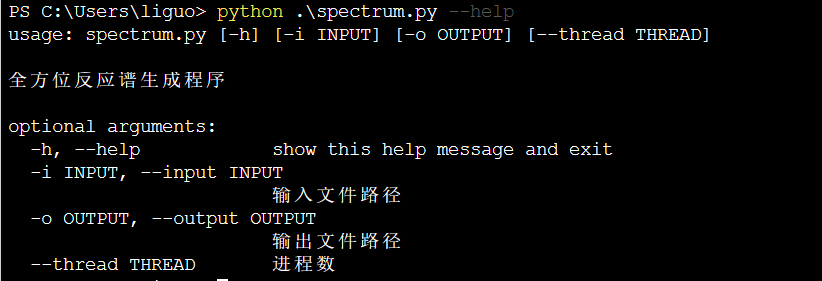

In [1]:
import sys

In [2]:
sys.path.append('D:/omnispectrum/omnispectrum/')

In [3]:
from omnispectrum import *

持时长但峰值段短使用基线修正会产生逆效果

022DLB.csv start
57700
57700
57700
跳过C:/Users/liguo/Downloads/原始数据/022DLB.csv
022FHT.csv start


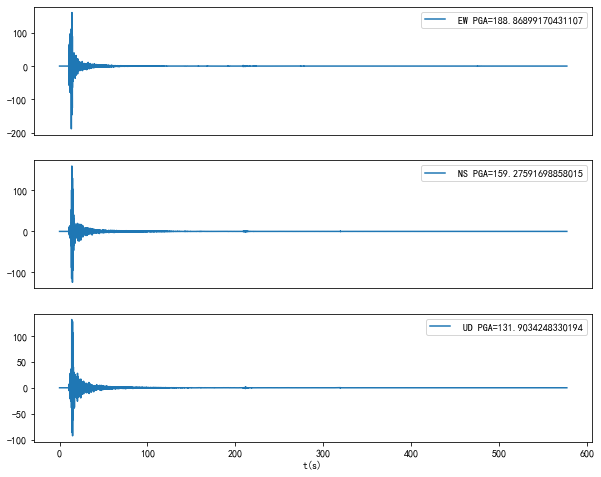

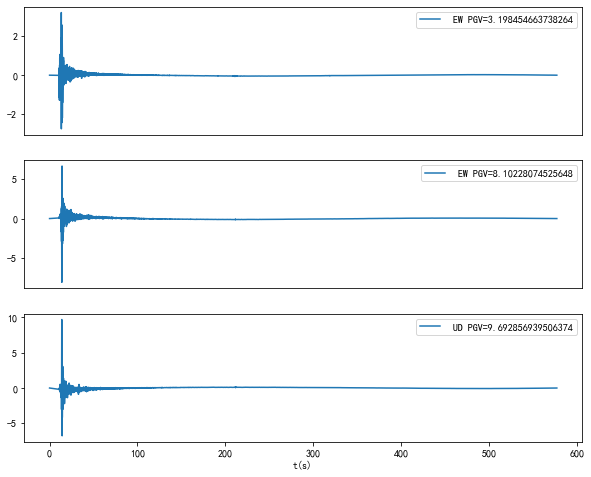

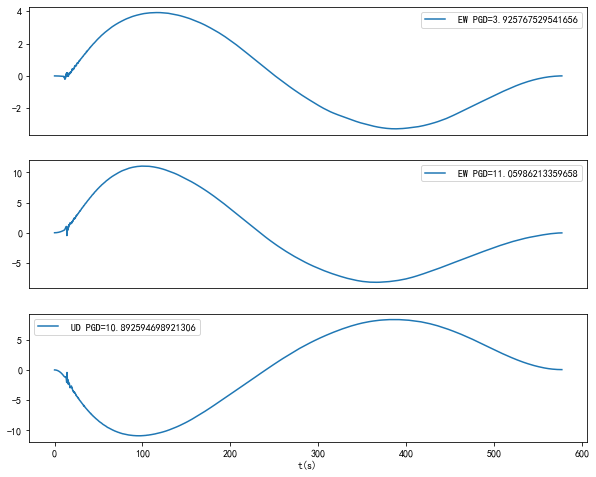

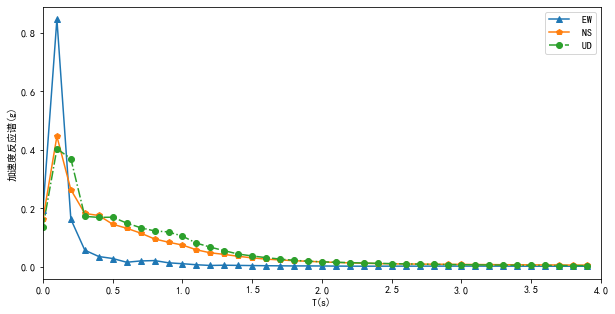

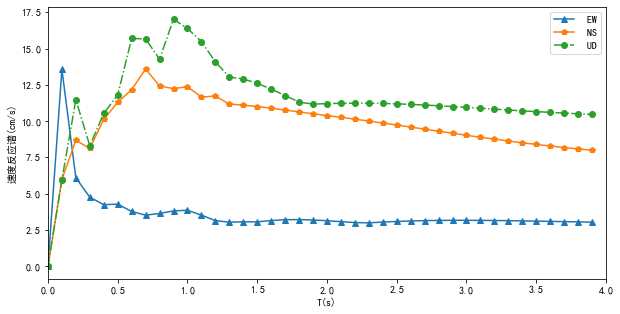

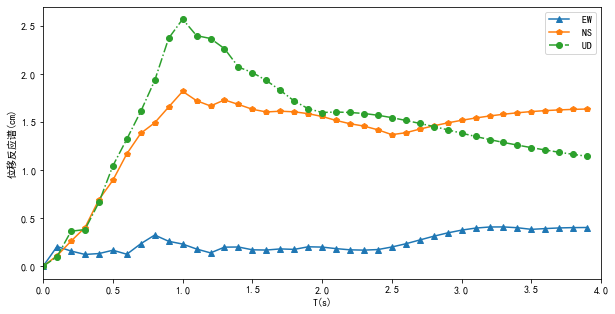

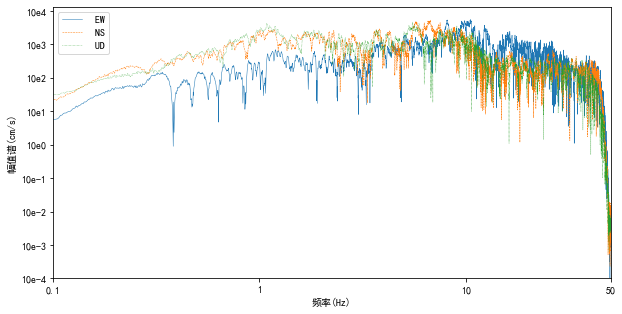

In [4]:
csv2docx('C:/Users/liguo/Downloads/原始数据/', 'C:/Users/liguo/Downloads/原始数据/', baseline_correction=True)

# 最后
1. 该脚本依然有任何问题，如果出现报错无法运行附上代码和报错截图提交issue
2. 感谢大家帮忙找BUG